In [1]:
import pandas as pd

data = pd.read_csv("ecommerce_return_data.csv")
print(data.head())


      Order_ID    Product_ID       User_ID  Order_Date Return_Date  \
0  ORD00000000  PROD00000000  USER00000000  2023-08-05  2024-08-26   
1  ORD00000001  PROD00000001  USER00000001  2023-10-09  2023-11-09   
2  ORD00000002  PROD00000002  USER00000002  2023-05-06         NaN   
3  ORD00000003  PROD00000003  USER00000003  2024-08-29         NaN   
4  ORD00000004  PROD00000004  USER00000004  2023-01-16         NaN   

  Product_Category  Product_Price  Order_Quantity Return_Reason Return_Status  \
0         Clothing         411.59               3  Changed mind      Returned   
1            Books         288.88               3    Wrong item      Returned   
2             Toys         390.03               5           NaN  Not Returned   
3             Toys         401.09               3           NaN  Not Returned   
4            Books         110.09               4           NaN  Not Returned   

   Days_to_Return  User_Age User_Gender User_Location Payment_Method  \
0           387.0   

In [2]:
# Numerical columns ke liye mean se bhar do
data.fillna(data.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)

# Categorical columns ke liye mode se bhar do
data.fillna(data.select_dtypes(include='object').mode().iloc[0], inplace=True)


In [3]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_enc.fit_transform(data[col])


In [6]:
X = data.drop("Return_Status", axis=1)  # Features
y = data["Return_Status"]               # Target label


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.924
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1009
           1       0.93      0.91      0.92       991

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



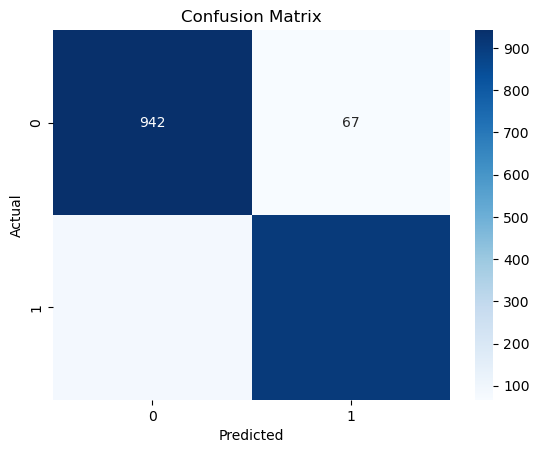

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
data["Return_Probability"] = model.predict_proba(X)[:, 1]
data["Return_Risk"] = data["Return_Probability"].apply(lambda x: "High" if x > 0.7 else "Low")
data.to_csv("return_risk_scored.csv", index=False)
